# Rate of Change Percentage (ROCP) 

https://www.tradingtechnologies.com/xtrader-help/x-study/technical-indicator-definitions/rate-of-change-rocp/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-02,167.199890,172.259995,172.300003,169.259995,170.160004,25555900
2018-01-03,167.170776,172.229996,174.550003,171.960007,172.529999,29517900
2018-01-04,167.947266,173.029999,173.470001,172.080002,172.539993,22434600
2018-01-05,169.859406,175.000000,175.369995,173.050003,173.440002,23660000
2018-01-08,169.228500,174.350006,175.610001,173.929993,174.350006,20567800


In [3]:
n = 12
df['ROCP'] = (df['Adj Close']/df['Adj Close'].shift(n)) - 1.0

In [4]:
df.head(20)

,Adj Close,Close,High,Low,Open,Volume,ROCP
Date,,,,,,,
2018-01-02,167.199890,172.259995,172.300003,169.259995,170.160004,25555900,NaN
2018-01-03,167.170776,172.229996,174.550003,171.960007,172.529999,29517900,NaN
2018-01-04,167.947266,173.029999,173.470001,172.080002,172.539993,22434600,NaN
2018-01-05,169.859406,175.000000,175.369995,173.050003,173.440002,23660000,NaN
2018-01-08,169.228500,174.350006,175.610001,173.929993,174.350006,20567800,NaN
2018-01-09,169.209091,174.330002,175.059998,173.410004,174.550003,21584000,NaN
2018-01-10,169.170258,174.289993,174.300003,173.000000,173.160004,23959900,NaN
2018-01-11,170.131180,175.279999,175.490005,174.490005,174.589996,18667700,NaN
2018-01-12,171.888031,177.089996,177.360001,175.649994,176.179993,25418100,NaN


In [5]:
df.tail()

,Adj Close,Close,High,Low,Open,Volume,ROCP
Date,,,,,,,
2018-12-24,144.656540,146.830002,151.550003,146.589996,148.149994,37169200,-0.159627
2018-12-26,154.843475,157.169998,157.229996,146.720001,148.300003,58582500,-0.067185
2018-12-27,153.838562,156.149994,156.770004,150.070007,155.839996,53117100,-0.079304
2018-12-28,153.917389,156.229996,158.520004,154.550003,157.500000,42291400,-0.073534
2018-12-31,155.405045,157.740005,159.360001,156.479996,158.529999,35003500,-0.067179


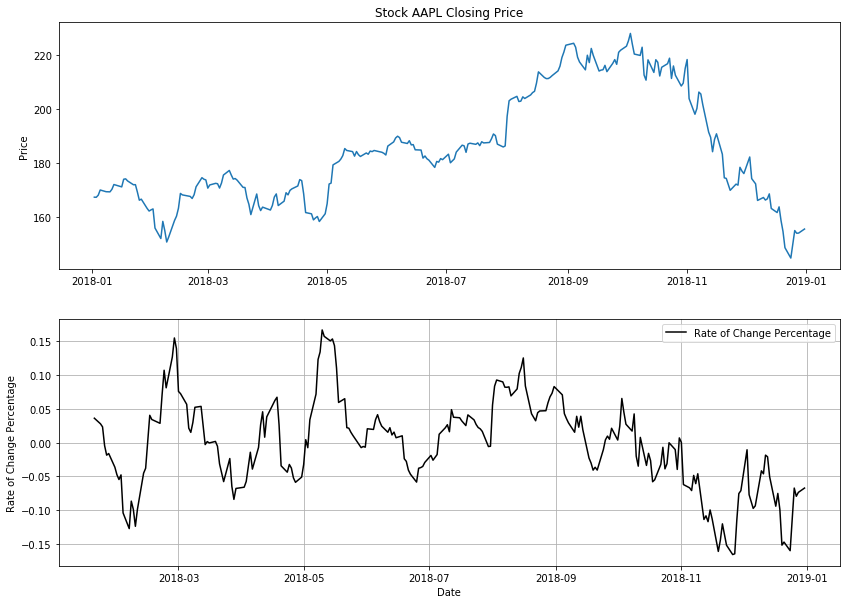

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['ROCP'], label='Rate of Change Percentage', color='black')
#ax2.axhline(y=0, color='blue', linestyle='--')
#ax2.axhline(y=10, color='red')
#ax2.axhline(y=-10, color='green')
ax2.grid()
ax2.set_ylabel('Rate of Change Percentage')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with (ROCP)

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Adj Close,Close,High,Low,Open,Volume,ROCP,VolumePositive
0,736696.0,167.199890,172.259995,172.300003,169.259995,170.160004,25555900,NaN,False
1,736697.0,167.170776,172.229996,174.550003,171.960007,172.529999,29517900,NaN,False
2,736698.0,167.947266,173.029999,173.470001,172.080002,172.539993,22434600,NaN,False
3,736699.0,169.859406,175.000000,175.369995,173.050003,173.440002,23660000,NaN,False
4,736702.0,169.228500,174.350006,175.610001,173.929993,174.350006,20567800,NaN,False


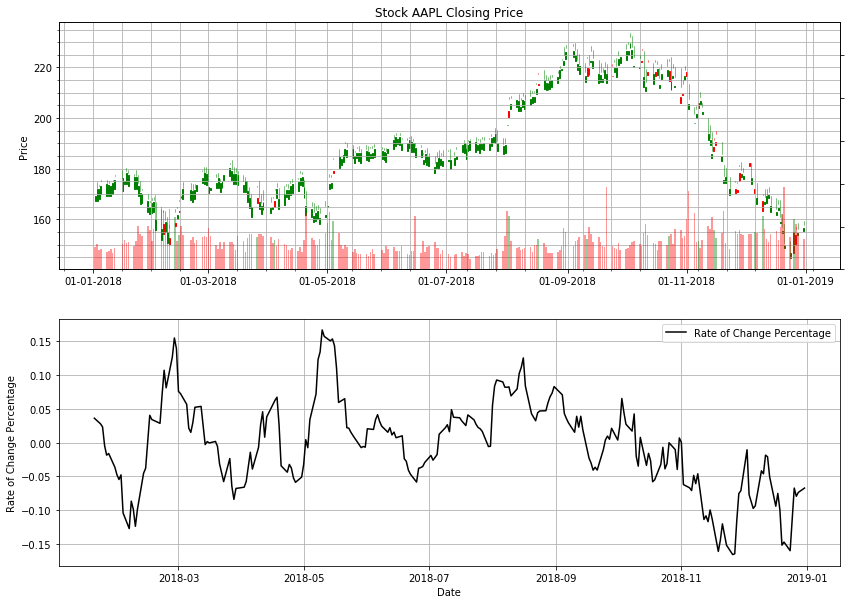

In [8]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['ROCP'], label='Rate of Change Percentage', color='black')
#ax2.axhline(y=0, color='blue', linestyle='--')
#ax2.axhline(y=10, color='red')
#ax2.axhline(y=-10, color='green')
ax2.grid()
ax2.set_ylabel('Rate of Change Percentage')
ax2.set_xlabel('Date')
ax2.legend(loc='best')